# Load Ntuple

In [1]:
%load_ext autoreload
%autoreload 2

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util

training_variables = util.training_variables
columns = util.all_relevant_variables

Welcome to JupyROOT 6.26/14


In [2]:
# 4S Data vs MC

cut = '(-4<B0_roeDeltae_my_mask) & (B0_roeDeltae_my_mask<1)'

# Load data files
MC_4S = uproot.concatenate([f'../../Samples/MC15ri/e_channel/local_200fb_control/*.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

data_4S = uproot.concatenate([f'../../Samples/Data/e_channel/proc13_4S_quaxo_4.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

df_mc_4S = pd.DataFrame(MC_4S)
df_data_4S = pd.DataFrame(data_4S)

In [3]:
lgb_tight = 'sig_prob==largest_prob and sig_prob>0.65 and fakeD_prob<0.05'
lgb_tight += ' and B0_roeMbc_my_mask>5'
lgb_comb = 'fakeD_prob<0.1 and continuum_prob<0.1 and combinatorial_prob>0.7'
lgb_cont = 'fakeD_prob<0.1 and continuum_prob>0.7 and combinatorial_prob<0.1'

for df in [df_mc_4S,df_data_4S,]:
    # df.eval(f'cos_D_l = (D_px*ell_px + D_py*ell_py + D_pz*ell_pz)/(D_p*ell_p)', inplace=True)
    df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
    df.eval('p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

df_mc_4S_sr = util.apply_mva_bcs(df_mc_4S, training_variables, lgb_tight, library='lgbm')
df_mc_4S_comb = util.apply_mva_bcs(df_mc_4S, training_variables, lgb_comb, library='lgbm')
df_data_4S_comb = util.apply_mva_bcs(df_data_4S, training_variables, lgb_comb, library='lgbm')

In [17]:
df_mc_4S_cont = util.apply_mva_bcs(df_mc_4S, training_variables, lgb_cont, library='lgbm')
df_data_4S_cont = util.apply_mva_bcs(df_data_4S, training_variables, lgb_cont, library='lgbm')
samples_cont = util.classify_mc_dict(df_mc_4S_cont, 'e', template=False)

mpl_cont=util.mpl(samples_cont,df_data_4S_cont)

In [4]:
samples=util.classify_mc_dict(df_mc_4S_comb, 'e', template=False)
samples_sr = util.classify_mc_dict(df_mc_4S_sr, 'e', template=False)

mpl=util.mpl(samples,df_data_4S_comb)

for name, df in samples.items():
    print(name, len(df))

bkg_fakeD 16988
bkg_TDFl 2365
bkg_fakeTracks 599
bkg_continuum 1725
bkg_combinatorial 18784
bkg_singleBbkg 2941
bkg_other_TDTl 0
$D\tau\nu$ 34
$D^\ast\tau\nu$ 23
$D\ell\nu$ 210
$D^\ast\ell\nu$ 217
$D^{\ast\ast}\tau\nu$ 93
$D^{\ast\ast}\ell\nu$_narrow 295
$D^{\ast\ast}\ell\nu$_broad 352
$D\ell\nu$_gap_pi 518
$D\ell\nu$_gap_eta 480
bkg_other_signal 0


In [32]:
lgb_sr_sinB = util.classify_combinatorial(samples_sr['bkg_singleBbkg'])
for name, df in lgb_sr_sinB.items():
    print(name, len(df))

DSemiB_ellPri 0
DSemiB_ellSec 57
DHad1Charm_ellPri 0
DHad1Charm_ellSec 327
DHad2Charm_ellPri 0
DHad2Charm_ellSec 9227
others 0


In [5]:
lgb_sb_comb = util.classify_combinatorial(samples['bkg_combinatorial'],merge=True)
lgb_sr_comb = util.classify_combinatorial(samples_sr['bkg_combinatorial'],merge=True)

samples_comb = samples.copy()
samples_comb.update({'bkg_combinatorial': pd.DataFrame(columns=columns)})
samples_comb.update(lgb_sb_comb)

samples_sr_comb = samples_sr.copy()
samples_sr_comb.update({'bkg_combinatorial': pd.DataFrame(columns=columns)})
samples_sr_comb.update(lgb_sr_comb)

mpl_comb=util.mpl(samples_comb, df_data_4S_comb)
mpl_sr=util.mpl(samples_sr_comb)

In [6]:
for name, df in samples_comb.items():
    print(name, len(df))

bkg_fakeD 16988
bkg_TDFl 2365
bkg_fakeTracks 599
bkg_continuum 1725
bkg_combinatorial 0
bkg_singleBbkg 2941
bkg_other_TDTl 0
$D\tau\nu$ 34
$D^\ast\tau\nu$ 23
$D\ell\nu$ 210
$D^\ast\ell\nu$ 217
$D^{\ast\ast}\tau\nu$ 93
$D^{\ast\ast}\ell\nu$_narrow 295
$D^{\ast\ast}\ell\nu$_broad 352
$D\ell\nu$_gap_pi 518
$D\ell\nu$_gap_eta 480
bkg_other_signal 0
SemileptonicB2D_PrimaryLepton 121
SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton 7339
HadronicB2D_SecondaryLepton 11324
others 0


In [9]:
for name, df in samples_sr_comb.items():
    print(name, len(df))

bkg_fakeD 47231
bkg_TDFl 6410
bkg_fakeTracks 2504
bkg_continuum 13201
bkg_combinatorial 0
bkg_singleBbkg 9611
bkg_other_TDTl 0
$D\tau\nu$ 4241
$D^\ast\tau\nu$ 2483
$D\ell\nu$ 90285
$D^\ast\ell\nu$ 57809
$D^{\ast\ast}\tau\nu$ 1472
$D^{\ast\ast}\ell\nu$_narrow 18372
$D^{\ast\ast}\ell\nu$_broad 14111
$D\ell\nu$_gap_pi 3468
$D\ell\nu$_gap_eta 3076
bkg_other_signal 0
SemileptonicB2D_PrimaryLepton 188
SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton 7004
HadronicB2D_SecondaryLepton 7931
others 0


In [7]:
# mu channel
cut = '(-4<B0_roeDeltae_my_mask) & (B0_roeDeltae_my_mask<1)'

# Load data files
MC_4S = uproot.concatenate([f'../../Samples/MC15ri/mu_channel/local_200fb_test/*.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

data_4S = uproot.concatenate([f'../../Samples/Data/mu_channel/proc13_4S_quaxo_1.root:B0'],
                          library="np",
                          cut = cut,
                          filter_branch=lambda branch: branch.name in columns)

df_mc_4S = pd.DataFrame(MC_4S)
df_data_4S = pd.DataFrame(data_4S)

lgb_tight = 'sig_prob==largest_prob and sig_prob>0.65 and fakeD_prob<0.05'
lgb_tight += ' and B0_roeMbc_my_mask>5'
lgb_comb = 'fakeD_prob<0.1 and continuum_prob<0.1 and combinatorial_prob>0.7'

for df in [df_mc_4S,df_data_4S]:
    # df.eval(f'cos_D_l = (D_px*ell_px + D_py*ell_py + D_pz*ell_pz)/(D_p*ell_p)', inplace=True)
    df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
    df.eval('p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

df_mc_4S_sr = util.apply_mva_bcs(df_mc_4S, training_variables, lgb_tight, library='lgbm')
df_mc_4S_comb = util.apply_mva_bcs(df_mc_4S, training_variables, lgb_comb, library='lgbm')
df_data_4S_comb = util.apply_mva_bcs(df_data_4S, training_variables, lgb_comb, library='lgbm')

samples=util.classify_mc_dict(df_mc_4S_comb, 'mu', template=False)
samples_sr = util.classify_mc_dict(df_mc_4S_sr, 'mu', template=False)

lgb_sb_comb = util.classify_combinatorial(samples['bkg_combinatorial'],merge=True)
lgb_sr_comb = util.classify_combinatorial(samples_sr['bkg_combinatorial'],merge=True)

samples_comb = samples.copy()
samples_comb.update({'bkg_combinatorial': pd.DataFrame(columns=columns)})
samples_comb.update(lgb_sb_comb)

samples_sr_comb = samples_sr.copy()
samples_sr_comb.update({'bkg_combinatorial': pd.DataFrame(columns=columns)})
samples_sr_comb.update(lgb_sr_comb)

mpl_comb=util.mpl(samples_comb, df_data_4S_comb)
mpl_sr=util.mpl(samples_sr_comb)


In [14]:
samples_comb['SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton'].ell_mcSecPhysProc.value_counts(dropna=False)

ell_mcSecPhysProc
0.0     7321
16.0      18
Name: count, dtype: int64

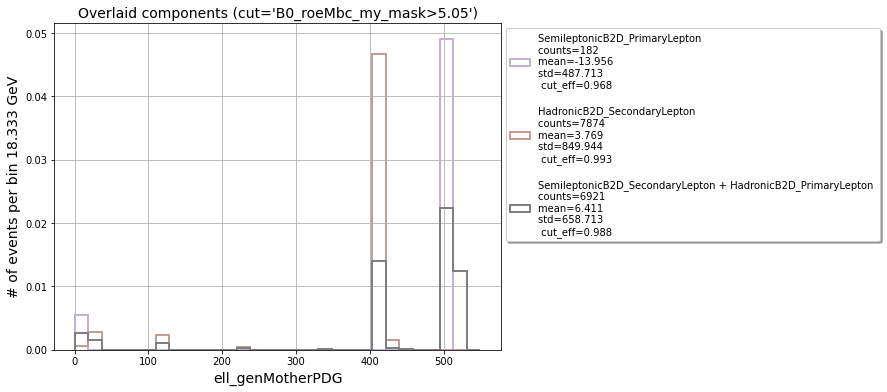

In [11]:
# e channel
b1 = np.linspace(0,550,31)
comb_conpon = ['SemileptonicB2D_PrimaryLepton', 'HadronicB2D_SecondaryLepton', 
               'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton',]
mpl_sr.plot_mc_1d_overlaid(variable='ell_genMotherPDG',bins=b1,mask=[],
                           cut='B0_roeMbc_my_mask>5.05',
                        show_only=comb_conpon,density=True,legend_nc=1)

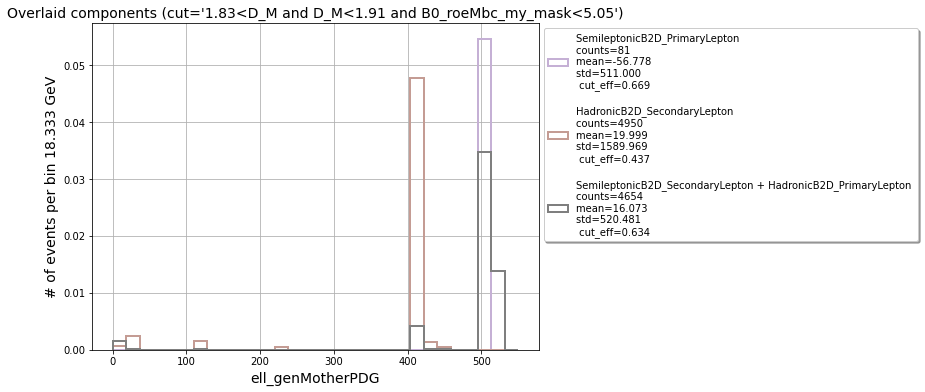

In [12]:
# e channel
b1 = np.linspace(0,550,31)
comb_conpon = ['SemileptonicB2D_PrimaryLepton', 'HadronicB2D_SecondaryLepton', 
               'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton',]
mpl_comb.plot_mc_1d_overlaid(variable='ell_genMotherPDG',bins=b1,mask=[],
                           cut='1.83<D_M and D_M<1.91 and B0_roeMbc_my_mask<5.05',
                        show_only=comb_conpon,density=True,legend_nc=1)

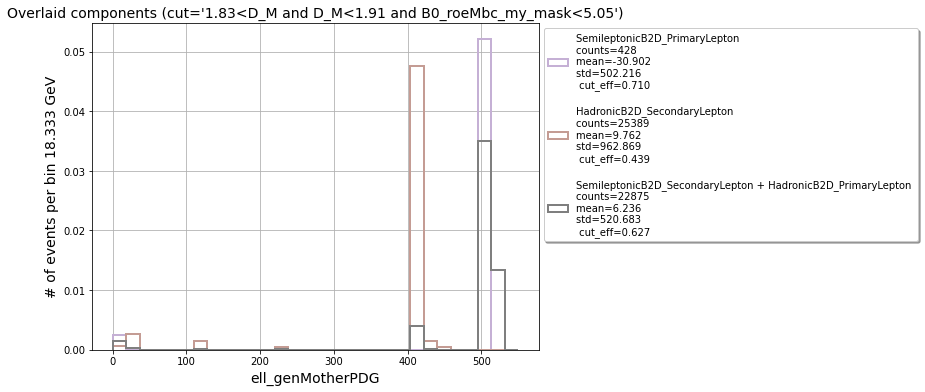

In [19]:
# e channel
b1 = np.linspace(0,550,31)
comb_conpon = ['SemileptonicB2D_PrimaryLepton', 'HadronicB2D_SecondaryLepton', 
               'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton',]
mpl_comb.plot_mc_1d_overlaid(variable='ell_genMotherPDG',bins=b1,mask=[],
                           cut='1.83<D_M and D_M<1.91 and B0_roeMbc_my_mask<5.05',
                        show_only=comb_conpon,density=True,legend_nc=1)

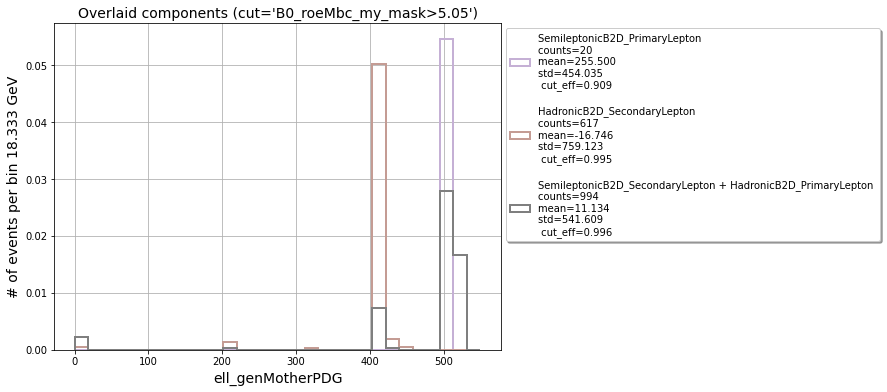

In [5]:
# mu channel
b1 = np.linspace(0,550,31)
comb_conpon = ['SemileptonicB2D_PrimaryLepton', 'HadronicB2D_SecondaryLepton', 
               'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton',]
mpl_sr.plot_mc_1d_overlaid(variable='ell_genMotherPDG',bins=b1,mask=[],
                           cut='B0_roeMbc_my_mask>5.05',
                        show_only=comb_conpon,density=True,legend_nc=1)

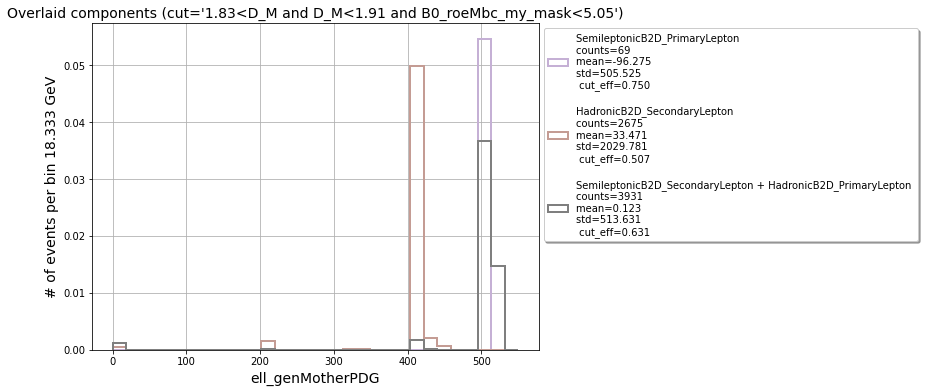

In [6]:
# mu channel
b1 = np.linspace(0,550,31)
comb_conpon = ['SemileptonicB2D_PrimaryLepton', 'HadronicB2D_SecondaryLepton', 
               'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton',]
mpl_comb.plot_mc_1d_overlaid(variable='ell_genMotherPDG',bins=b1,mask=[],
                           cut='1.83<D_M and D_M<1.91 and B0_roeMbc_my_mask<5.05',
                        show_only=comb_conpon,density=True,legend_nc=1)

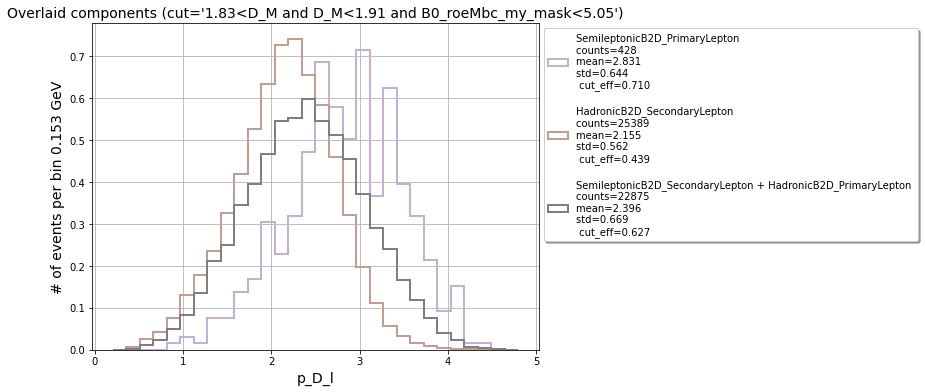

In [10]:
b1 = np.linspace(0.2,4.8,31)
comb_conpon = ['SemileptonicB2D_PrimaryLepton', 'HadronicB2D_SecondaryLepton', 
               'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton',]
mpl_comb.plot_mc_1d_overlaid(variable='p_D_l',bins=b1,mask=[],
                           cut='1.83<D_M and D_M<1.91 and B0_roeMbc_my_mask<5.05',
                        show_only=comb_conpon,density=True,legend_nc=1)

# Control regions
## 1. roeMbc<5
### a. Plot data vs MC

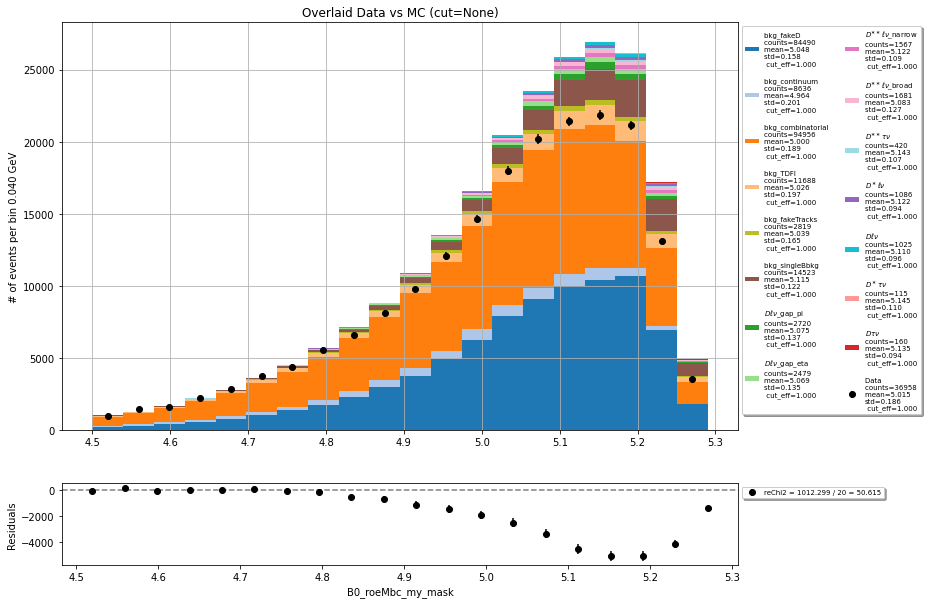

In [18]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(4.5,5.29,21)
weights={'SemileptonicB2D_PrimaryLepton':1,
         'HadronicB2D_SecondaryLepton':1,
         'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton':1,
         'data':1000/187}
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_roeMbc_my_mask',bins=b1,cut=None,weights=weights,
    correction=False,mask=[],figsize=(13,8.5),ratio=False,
                                legend_nc=2, legend_fs=7)

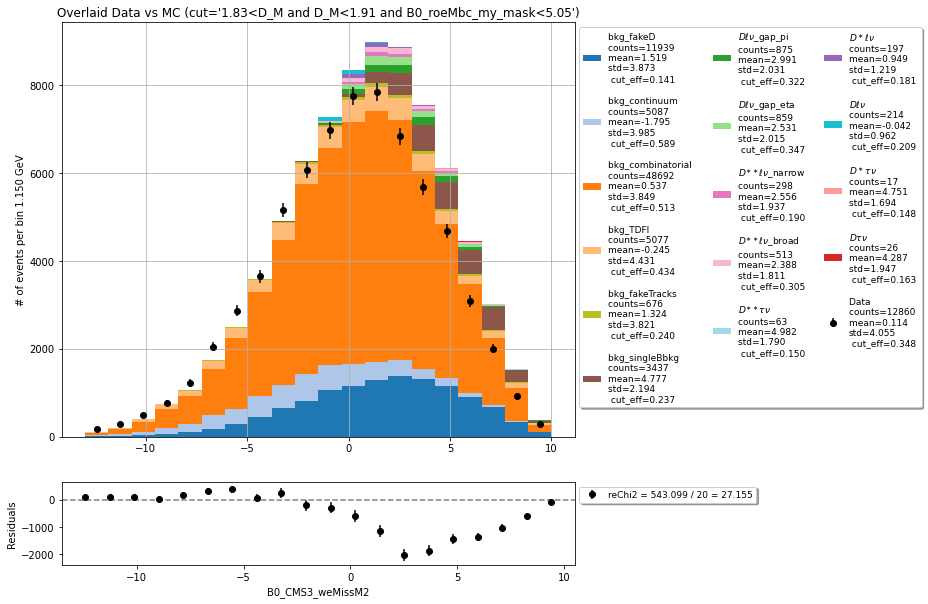

In [56]:
# D_M signal region
b1 = np.linspace(-13,10,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(13,8.5),
                          cut='1.83<D_M and D_M<1.91 and B0_roeMbc_my_mask<5.05',
                             correction=False,mask=[],ratio=False,
                             legend_nc=3,legend_fs=9,
                             weights=weights)

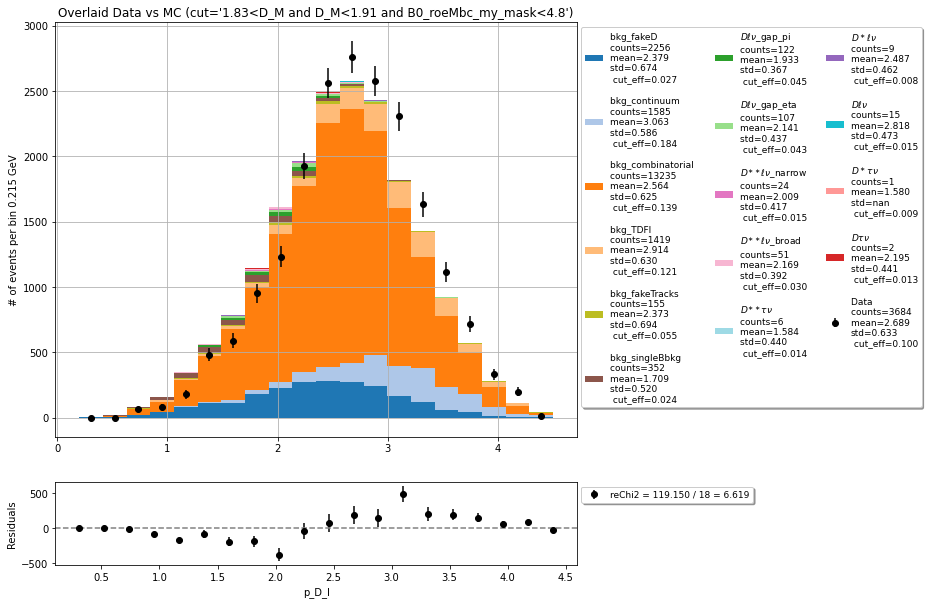

In [35]:
b2 = np.linspace(0.2,4.5,21)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,figsize=(13,8.5),
                          cut='1.83<D_M and D_M<1.91 and B0_roeMbc_my_mask<4.8',
                             correction=False,mask=[],ratio=False,
                             legend_nc=3,legend_fs=9,
                             weights=weights)

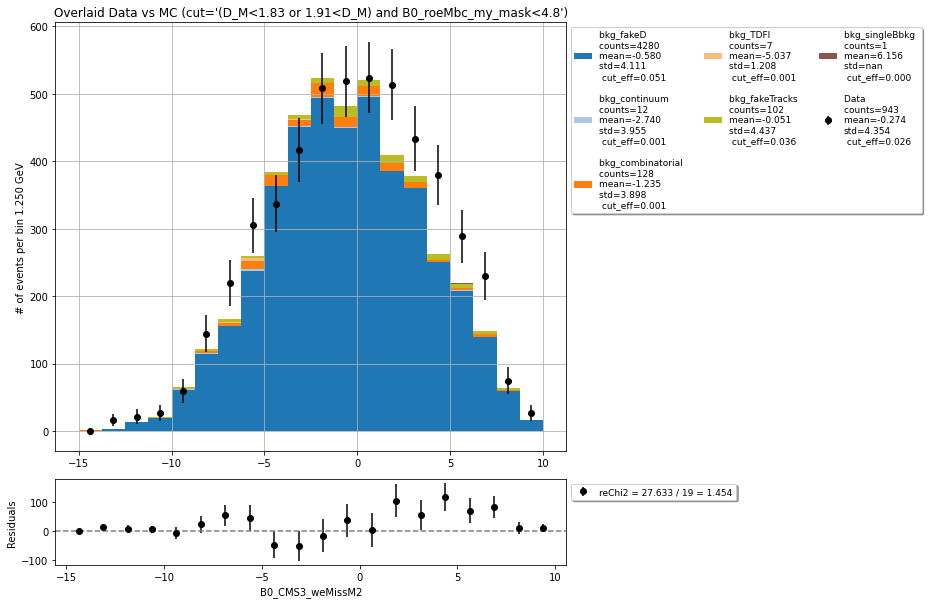

In [43]:
# sidebands
b1 = np.linspace(-15,10,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(13,8.5),
                          cut='(D_M<1.83 or 1.91<D_M) and B0_roeMbc_my_mask<4.8',
                            correction=False,mask=[],ratio=False,
                            legend_nc=3,legend_fs=9,
                            weights=weights)

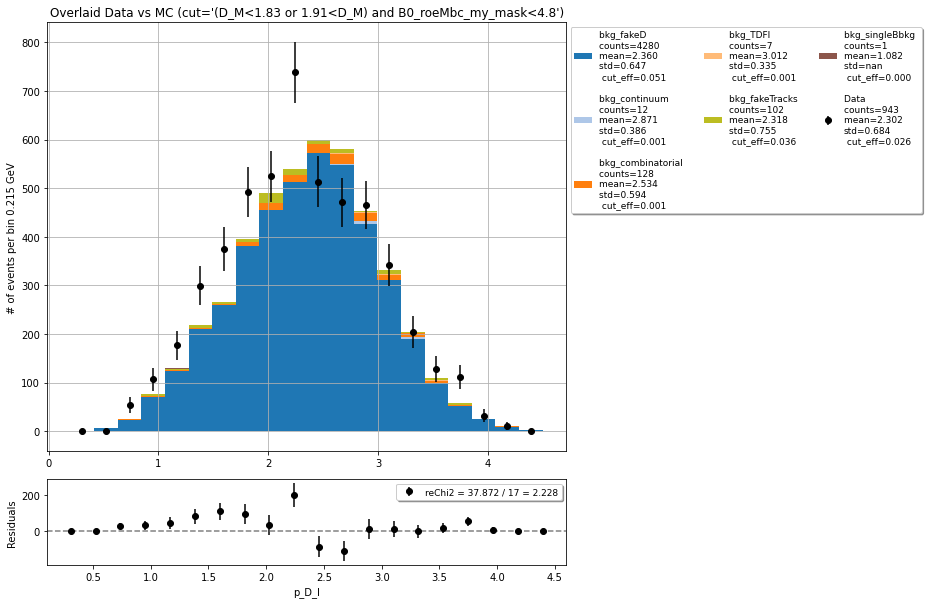

In [45]:
# sidebands
b2 = np.linspace(0.2,4.5,21)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,figsize=(13,8.5),
                          cut='(D_M<1.83 or 1.91<D_M) and B0_roeMbc_my_mask<4.8',
                            correction=False,mask=[],ratio=False,
                            legend_nc=3,legend_fs=9,
                            weights=weights)

### b. Plot lgb sidebands vs signal region

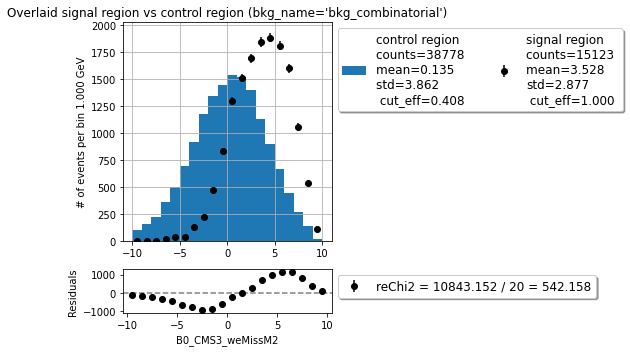

In [15]:
# compare control vs signal regions MC
b1 = np.linspace(-10,10,21)
weights = {'control region': 151/388,
         'signal region': 1}
mpl.plot_mc_sig_control(variable='B0_CMS3_weMissM2',bins=b1,
                        bkg_name='bkg_combinatorial',
                        cut='B0_roeMbc_my_mask<5',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

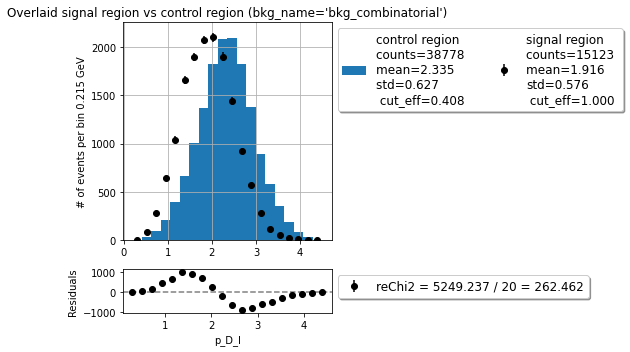

In [16]:
b2 = np.linspace(0.2,4.5,21)
mpl.plot_mc_sig_control(variable='p_D_l',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_roeMbc_my_mask<5',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

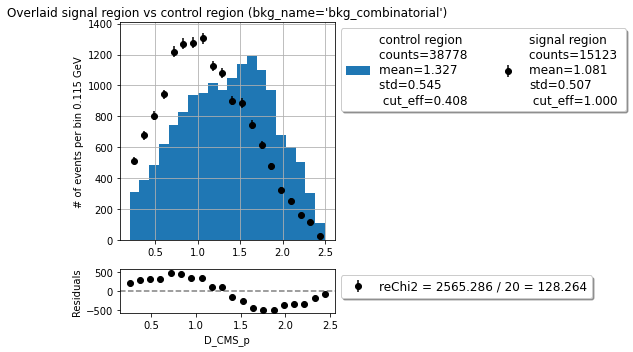

In [17]:
b2 = np.linspace(0.2,2.5,21)
mpl.plot_mc_sig_control(variable='D_CMS_p',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_roeMbc_my_mask<5',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

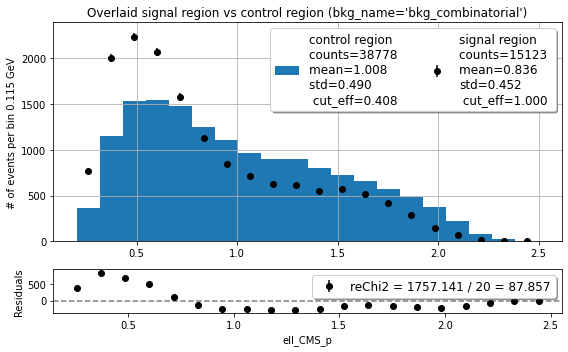

In [18]:
b2 = np.linspace(0.2,2.5,21)
mpl.plot_mc_sig_control(variable='ell_CMS_p',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_roeMbc_my_mask<5',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

### c. Subtract the fakeD

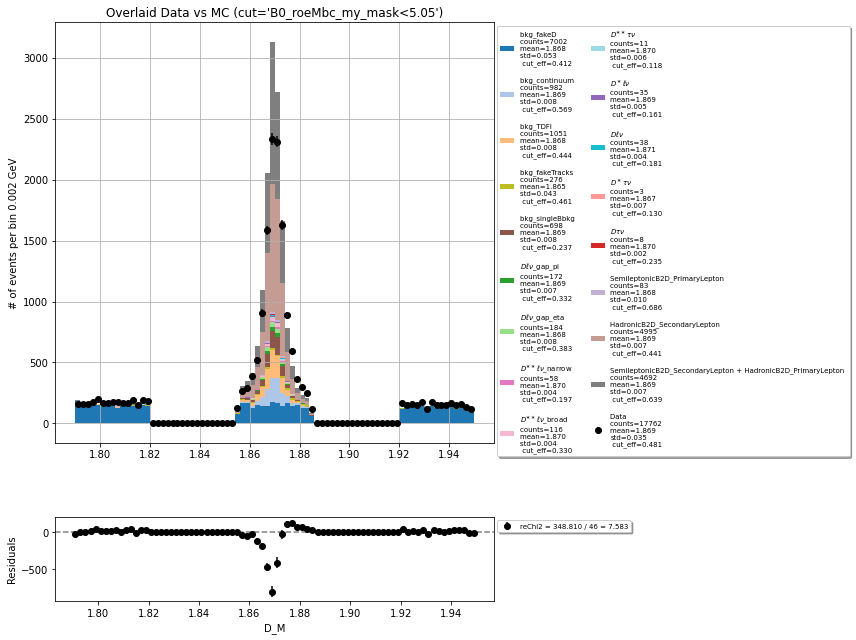

In [7]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,81)
weights={'SemileptonicB2D_PrimaryLepton':1,
         'HadronicB2D_SecondaryLepton':1,
         'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton':1,
         'all_mc':187/200}
data_hist_all, mc_hist_all = mpl_comb.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='B0_roeMbc_my_mask<5.05',correction=False,mask=[],
    figsize=(12,9),ratio=False,legend_nc=2,legend_fs=7,
    weights=weights)

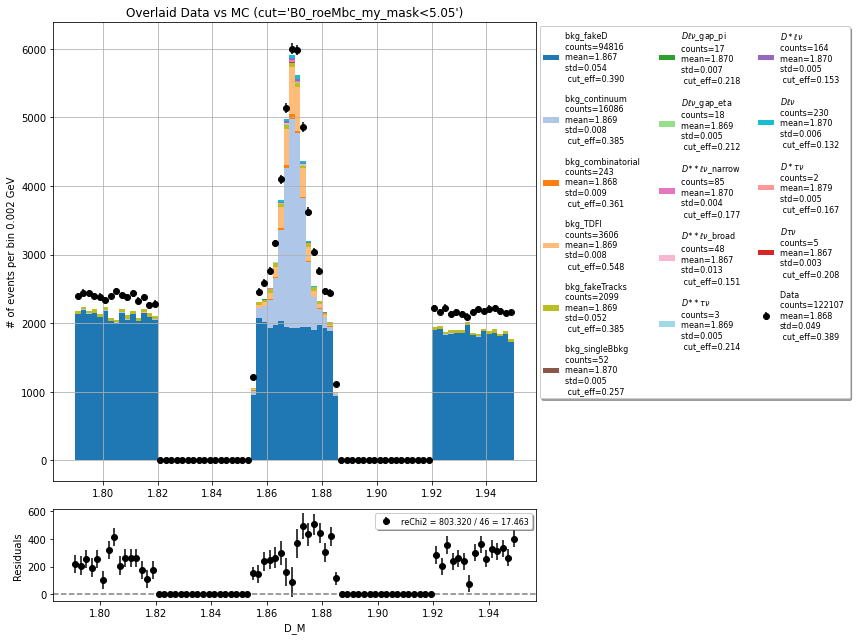

In [26]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,81)
weights={'SemileptonicB2D_PrimaryLepton':1,
         'HadronicB2D_SecondaryLepton':1,
         'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton':1,
         'all_mc':187/200}
data_hist_all, mc_hist_all = mpl_cont.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='B0_roeMbc_my_mask<5.05',correction=False,mask=[],
    figsize=(12,9),ratio=False,legend_nc=3,legend_fs=8,
    weights=weights)

In [27]:
fitter = util.fit_Dmass(x_edges=b1, hist=data_hist_all, poly_only=True)
m_ml, c_ml, result_ml = fitter.fit_gauss_poly_ML(deg=1)
m_ml

initial parameters= [ 2.44200e+02  1.87000e+00  5.00000e-02  1.22107e+05 -1.60500e+03
  5.28190e+03]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 22.83 (chi2/ndof = 0.9)    │              Nfcn = 255              │
│ EDM = 3.12e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │    0.0    │    2.4    │            │            │    0    │         │  yes  │
│ 1 │ x1   │   1.870   │   0.019   │            │            │    0    │         │  yes  │
│ 2 │ x2   │  50.0e-3  │  0.5e-3   │            │            │    0    │         │  yes  │
│ 3 │ x3   │  182.5e3  │   0.7e3   │            │            │         │         │       │
│ 4 │ x4   │  -0.5e6   │   0.9e6   │            │            │         │         │       │
│ 5 │ x5   │   1.6e6   │   3.1e6   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4        x5 │
├────┼─────────────────────────────────────────────────────────────┤
│ x0 │         0         0         0         0         0         0 │
│ x1 │         0         0         0         0         0         0 │
│ x2 │         0         0         0         0         0         0 │
│ x3 │         0         0         0  5.05e+05  1.53e+05 -1.56e+06 │
│ x4 │         0         0         0  1.53e+05   8.8e+11 -2.87e+12 │
│ x5 │         0         0         0 -1.56e+06 -2.87e+12  9.39e+12 │
└────┴─────────────────────────────────────────────────────────────┘

In [28]:
yields_left = fitter.poly_integral(xrange=[1.79,1.82],result=result_ml)
yields_sig = fitter.poly_integral(xrange=[1.855,1.885],result=result_ml)
yields_right = fitter.poly_integral(xrange=[1.92,1.95],result=result_ml)

Yields from 1.79 to 1.82 = 35817.887 ± 193.656
Yields from 1.855 to 1.885 = 34224.422 ± 133.180
Yields from 1.92 to 1.95 = 32630.958 ± 179.848


In [29]:
a = len(df_data_4S_comb.query('1.79<D_M<1.82 and B0_roeMbc_my_mask<5.05'))
b = len(df_data_4S_comb.query('1.92<D_M<1.95 and B0_roeMbc_my_mask<5.05'))
print('data', a,b)

data 2613 2289


In [30]:
a = len(df_data_4S_cont.query('1.79<D_M<1.82 and B0_roeMbc_my_mask<5.05'))
b = len(df_data_4S_cont.query('1.92<D_M<1.95 and B0_roeMbc_my_mask<5.05'))
print('data', a,b)

data 35743 32626


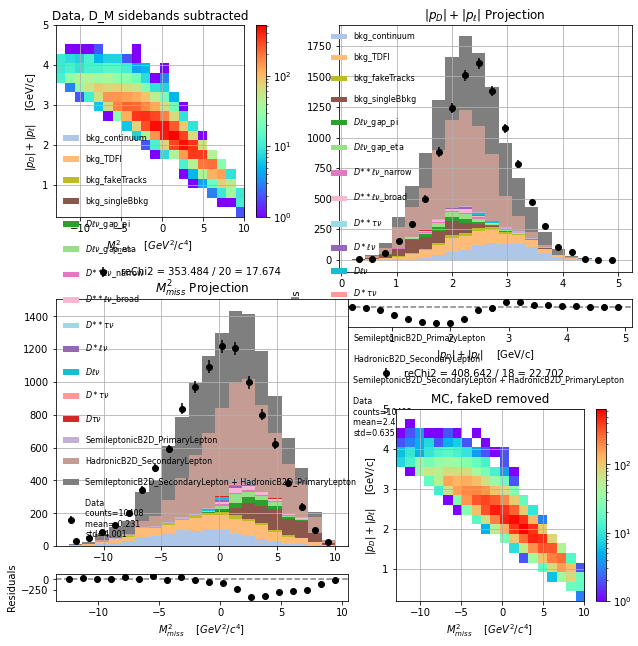

In [12]:
# e channel, lgb_comb
b_mm2 = np.linspace(-13,10,21)
b_pDl = np.linspace(0.2,5,21)
scale = {'data left sideband': 2442/2597/2,
         'data right sideband': 2442/2287/2,
         'data signal region': 1,
         'all_mc': 187/200}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl_comb.plot_data_subtracted_and_mc(**par_dict)

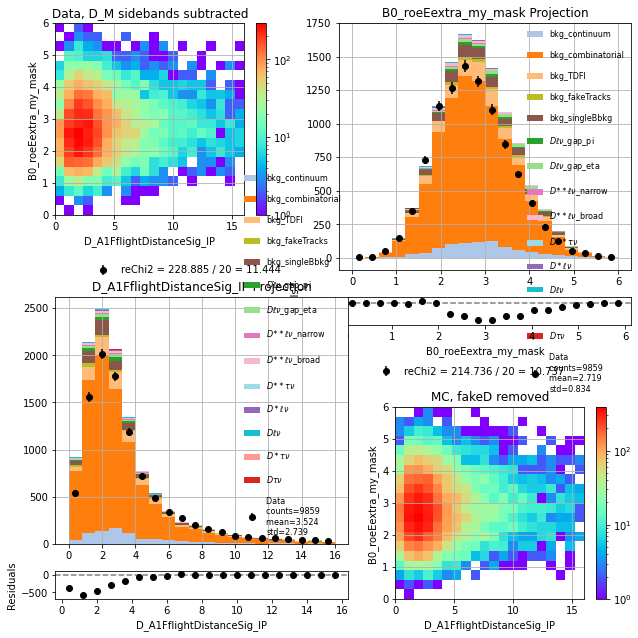

In [18]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,16,21)
b_pDl = np.linspace(0,6,21)

par_dict={'var_list':['D_A1FflightDistanceSig_IP','B0_roeEextra_my_mask'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

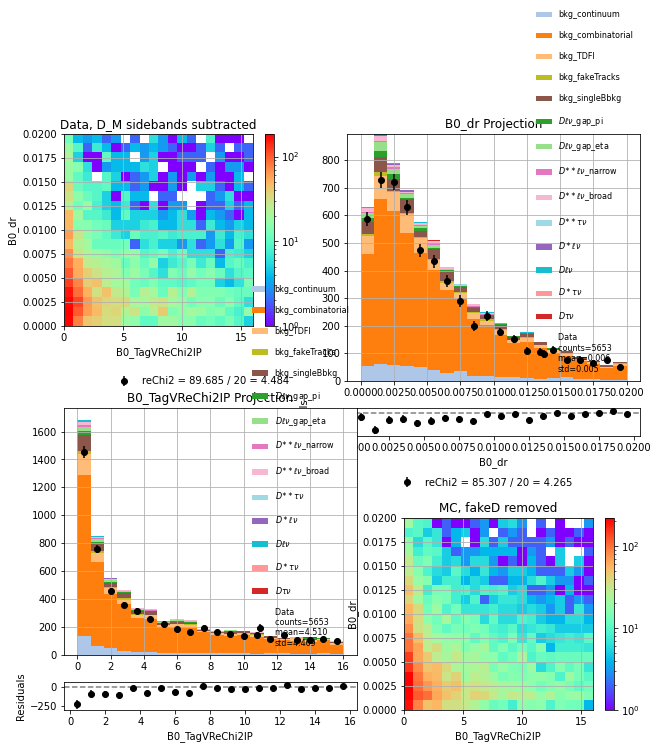

In [19]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,16,21)
b_pDl = np.linspace(0,0.02,21)

par_dict={'var_list':['B0_TagVReChi2IP','B0_dr'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

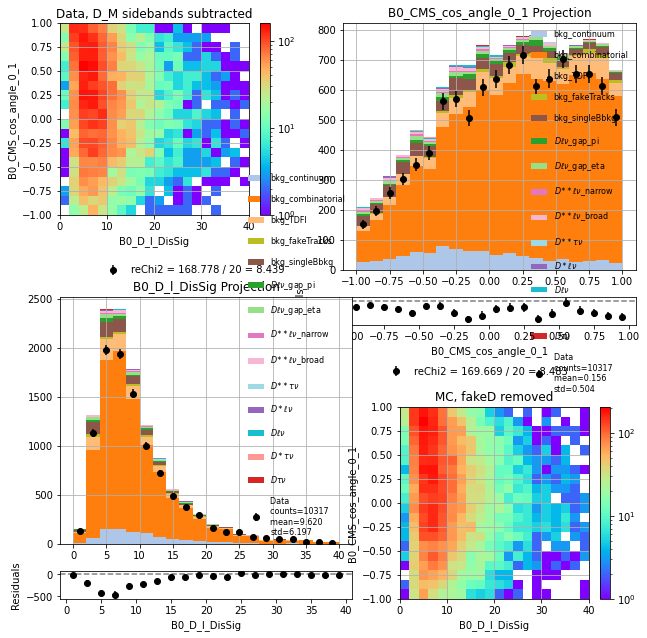

In [20]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,40,21)
b_pDl = np.linspace(-1,1,21)

par_dict={'var_list':['B0_D_l_DisSig','B0_CMS_cos_angle_0_1'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

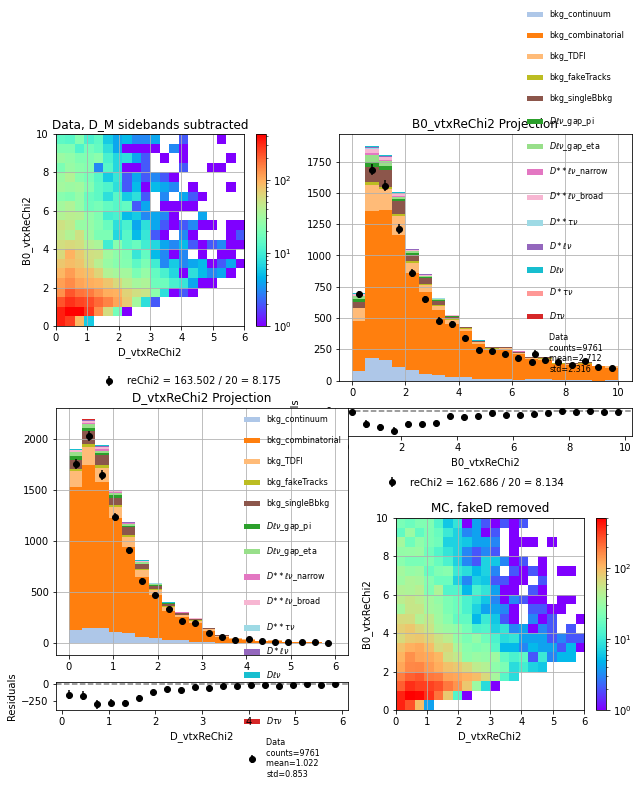

In [21]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,6,21)
b_pDl = np.linspace(0,10,21)

par_dict={'var_list':['D_vtxReChi2','B0_vtxReChi2'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl.plot_data_subtracted_and_mc(**par_dict)

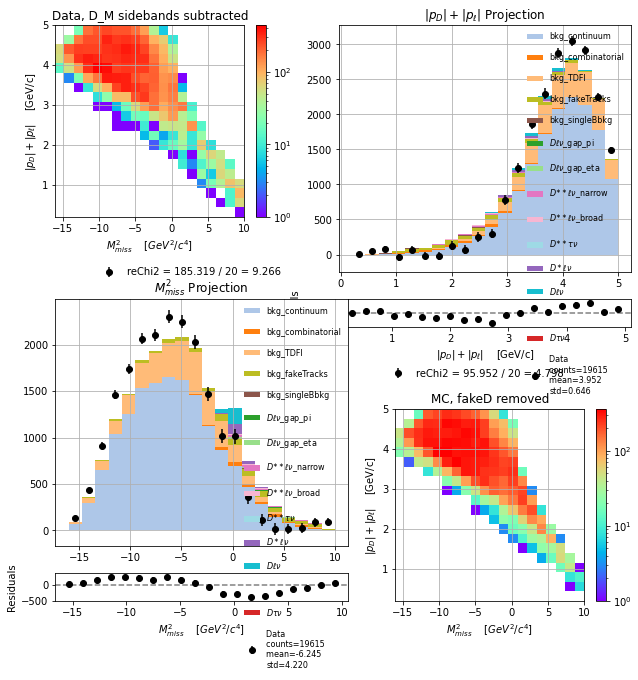

In [33]:
# e channel, lgb_comb
b_mm2 = np.linspace(-16,10,21)
b_pDl = np.linspace(0.2,5,21)
scale_cont = {'data left sideband': 34224/35817/2,
         'data right sideband': 34224/32630/2,
         'data signal region': 1,
         'all_mc': 187/200}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale_cont,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl_cont.plot_data_subtracted_and_mc(**par_dict)

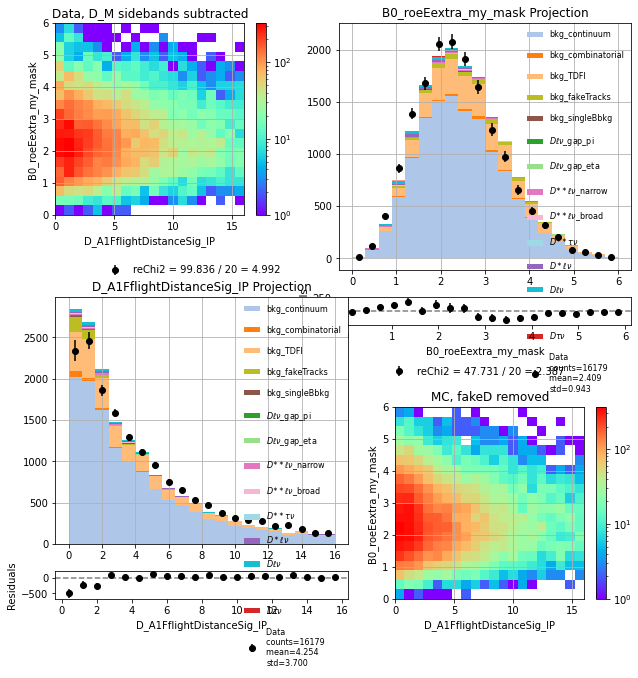

In [34]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,16,21)
b_pDl = np.linspace(0,6,21)

par_dict={'var_list':['D_A1FflightDistanceSig_IP','B0_roeEextra_my_mask'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale_cont,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl_cont.plot_data_subtracted_and_mc(**par_dict)

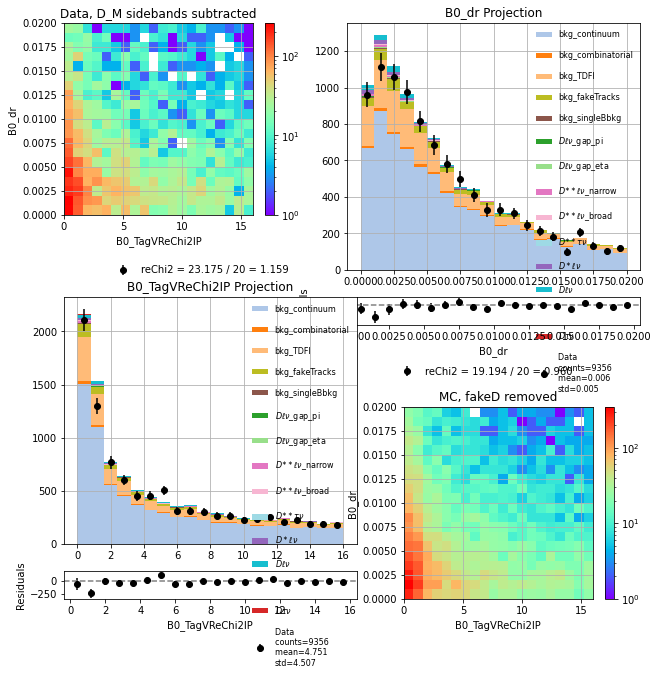

In [35]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,16,21)
b_pDl = np.linspace(0,0.02,21)

par_dict={'var_list':['B0_TagVReChi2IP','B0_dr'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale_cont,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl_cont.plot_data_subtracted_and_mc(**par_dict)

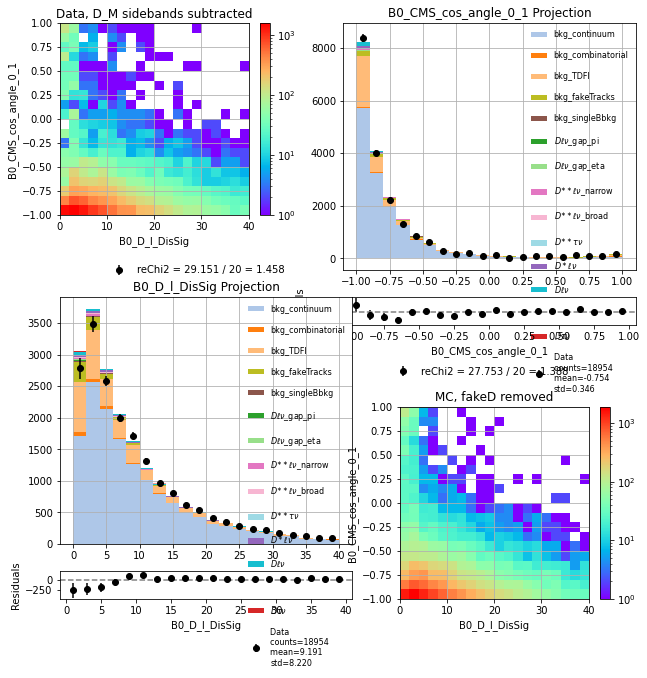

In [36]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,40,21)
b_pDl = np.linspace(-1,1,21)

par_dict={'var_list':['B0_D_l_DisSig','B0_CMS_cos_angle_0_1'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale_cont,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl_cont.plot_data_subtracted_and_mc(**par_dict)

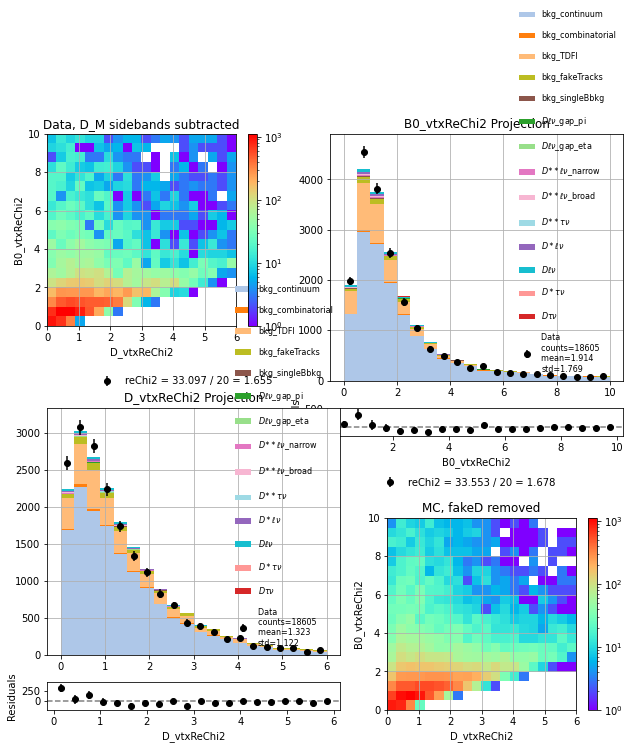

In [37]:
# e channel, lgb_comb
b_mm2 = np.linspace(0,6,21)
b_pDl = np.linspace(0,10,21)

par_dict={'var_list':['D_vtxReChi2','B0_vtxReChi2'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale_cont,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl_cont.plot_data_subtracted_and_mc(**par_dict)

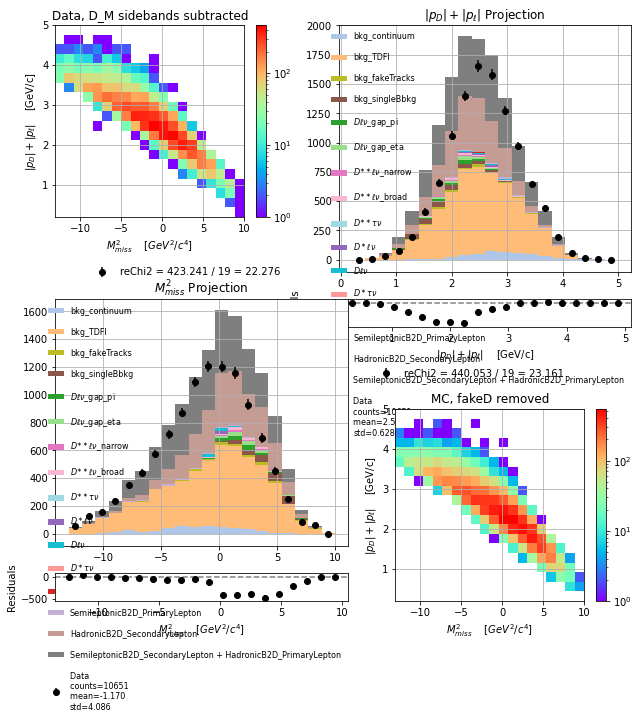

In [12]:
# mu channel
b_mm2 = np.linspace(-13,10,21)
b_pDl = np.linspace(0.2,5,21)
scale = {'data left sideband': 2209/2351/2 * 200/187,
         'data right sideband': 2209/2066/2 * 200/187,
         'data signal region': 200/187}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl_comb.plot_data_subtracted_and_mc(**par_dict)

### d.  Fit the combinatorial components

In [62]:
import json
spec_comb_e = util.create_workspace(temp_asimov_channels=[temp_data],
                               mc_uncer=True,fakeD_uncer=True)
spec_comb_e['measurements'][0]['config']['poi']="SemileptonicB2D_PrimaryLepton_norm"
print(json.dumps(spec_comb_e, sort_keys=True, indent=4))

{
    "channels": [
        {
            "name": "channel_0",
            "samples": [
                {
                    "data": [
                        6.0,
                        10.0,
                        3.0,
                        1.0,
                        14.0,
                        3.0,
                        4.0,
                        1.0,
                        0.0,
                        30.0,
                        29.0,
                        7.0,
                        5.0,
                        2.0,
                        10.0,
                        56.0,
                        27.0,
                        11.0,
                        11.0,
                        4.0,
                        0.0,
                        50.0,
                        44.0,
                        16.0,
                        4.0,
                        1.0,
                        0.0,
                        0.0,
                        37.0,
          

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\ell\nu$_gap_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier HadronicB2D_SecondaryLepton_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier SemileptonicB2D_PrimaryLepton_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton_

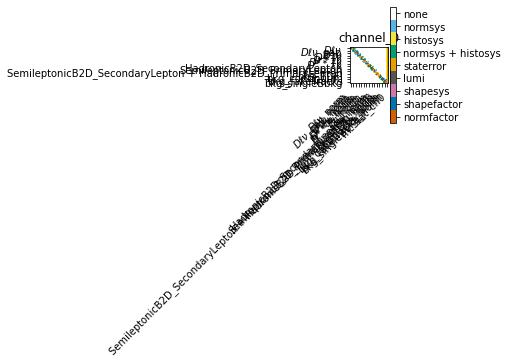

In [63]:
import cabinetry, pyhf
cabinetry.set_logging()
cabinetry.visualize.modifier_grid(pyhf.Workspace(spec_comb_e).model())

In [73]:
model_comb, data_comb = cabinetry.model_utils.model_and_data(spec_comb_e)
pars = model_comb.config.suggested_init()

norm_parameter_names = [par for par in model_comb.config.par_order if par.endswith('_norm')]
for par in norm_parameter_names:
    model_comb.config.param_set(par).suggested_bounds=[[-100,100]]
    if par=='SemileptonicB2D_PrimaryLepton_norm':
        model_comb.config.param_set(par).suggested_bounds=[[-0.9,1.1]]
    if par.startswith('$'):
        model_comb.config.param_set(par).suggested_fixed=[True]

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\ell\nu$_gap_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier HadronicB2D_SecondaryLepton_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier SemileptonicB2D_PrimaryLepton_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton_

In [74]:
%%time
pyhf.set_backend("jax")
fit_results = cabinetry.fit.fit(model=model_comb, data=data_comb,goodness_of_fit=True,
#                                 init_pars=[1]*7+[10]*3+pars[10:],
#                                 fix_pars=[True]*132
                               )

INFO - cabinetry.fit - performing maximum likelihood fit
INFO - cabinetry.fit - Migrad status:
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3031                       │       Nfcn = 9271, Ngrad = 10        │
│ EDM = 0.000202 (Goal: 0.0002)    │            time = 0.7 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │       SOME Parameters at limit       │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴───────

INFO - cabinetry.fit - mcStat_ch0[51]                                                   =  1.1405 +/- 0.0186
INFO - cabinetry.fit - mcStat_ch0[52]                                                   =  1.1269 +/- 0.0227
INFO - cabinetry.fit - mcStat_ch0[53]                                                   =  1.1434 +/- 0.0318
INFO - cabinetry.fit - mcStat_ch0[54]                                                   =  1.1281 +/- 0.0469
INFO - cabinetry.fit - mcStat_ch0[55]                                                   =  1.1126 +/- 0.0789
INFO - cabinetry.fit - mcStat_ch0[56]                                                   =  0.9529 +/- 0.1796
INFO - cabinetry.fit - mcStat_ch0[57]                                                   =  0.7684 +/- 0.3062
INFO - cabinetry.fit - mcStat_ch0[58]                                                   =  2.2317 +/- 0.9058
INFO - cabinetry.fit - mcStat_ch0[59]                                                   =  0.7962 +/- 0.0387
INFO - cabinetry.fi

DEBUG - cabinetry.fit - Delta NLL = 1274.438400
DEBUG - cabinetry.fit - number of degrees of freedom: 123
INFO - cabinetry.fit - p-value for goodness-of-fit test: 0.00%


CPU times: user 3.12 s, sys: 17.3 ms, total: 3.13 s
Wall time: 3.13 s


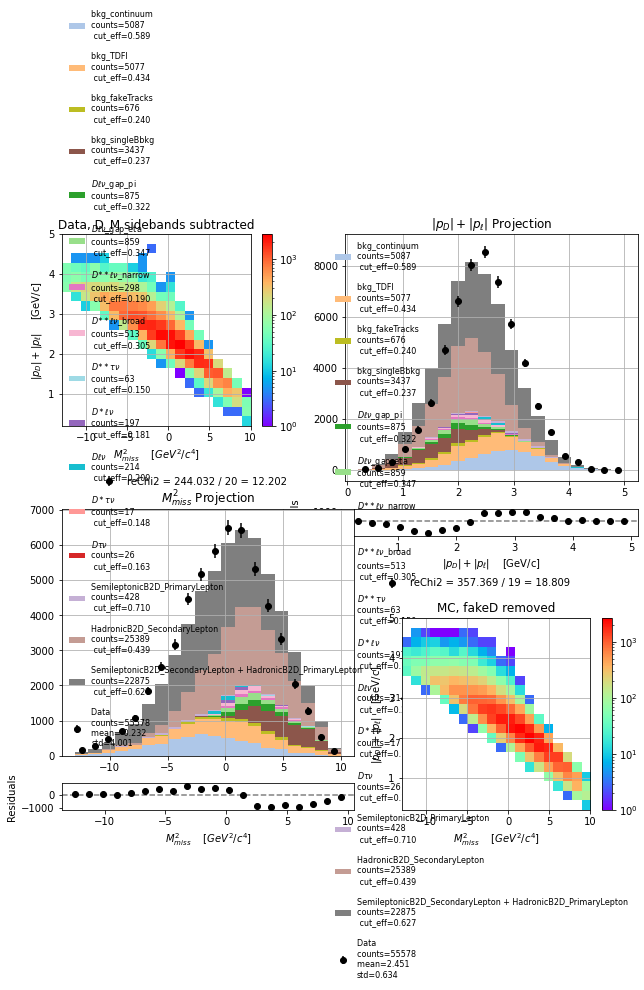

In [75]:
# BDT signal
b_mm2 = np.linspace(-13,10,21)
b_pDl = np.linspace(0.2,5,21)
weights={'data left sideband': 131/139/2 * 1000/187,
         'data right sideband': 131/122/2 * 1000/187,
         'data signal region': 1000/187,
         'SemileptonicB2D_PrimaryLepton': 1.1,
         'HadronicB2D_SecondaryLepton': 0.648,
         'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton': 0.971,}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': weights,
          'correction': False,
          'mask': ['bkg_fakeD']}
a, b = mpl_comb.plot_data_subtracted_and_mc(**par_dict)

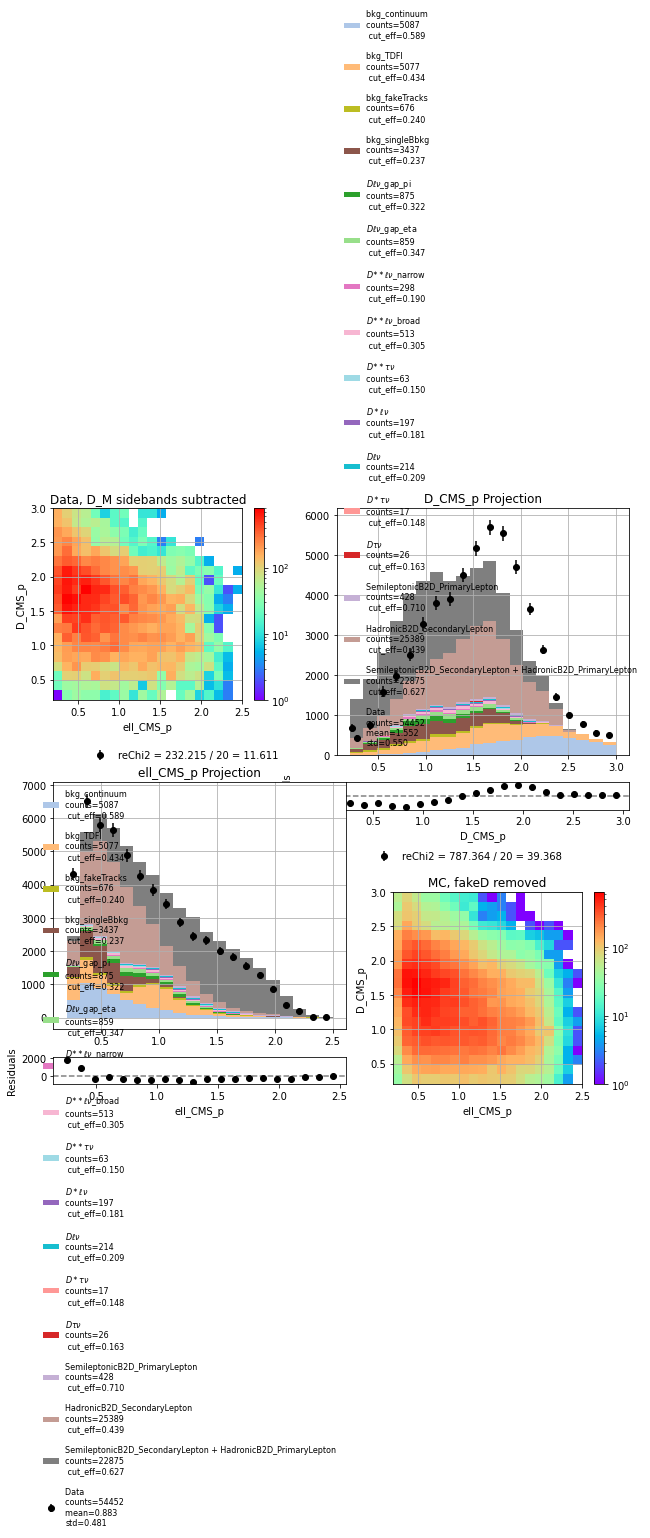

In [78]:
# BDT signal, pl; pd
b_mm2 = np.linspace(0.2,2.5,21)
b_pDl = np.linspace(0.2,3,21)
par_dict={'var_list':['ell_CMS_p','D_CMS_p'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_roeMbc_my_mask<5.05',
          'weights': weights,
          'correction': False,
          'mask': ['bkg_fakeD']}
a,b = mpl_comb.plot_data_subtracted_and_mc(**par_dict)

## 2. B0_vtxReChi2>5
### a. Plot Data vs MC

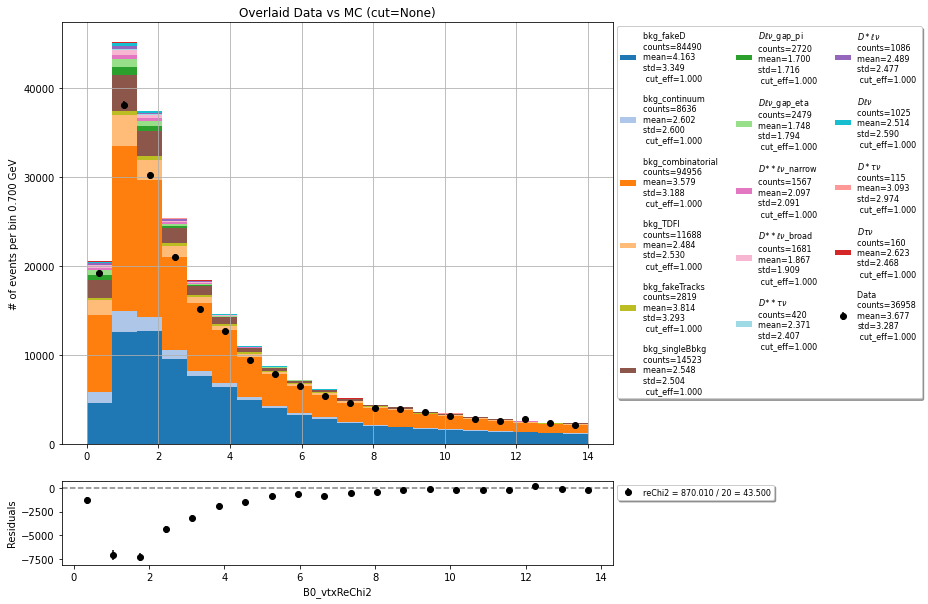

In [79]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(0,14,21)
weights={'SemileptonicB2D_PrimaryLepton':1,
         'HadronicB2D_SecondaryLepton':1,
         'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton':1,
         'data':1000/187}
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_vtxReChi2',bins=b1,cut=None,weights=weights,
    correction=False,mask=[],figsize=(13,8.5),ratio=False,
                                legend_nc=3, legend_fs=8)

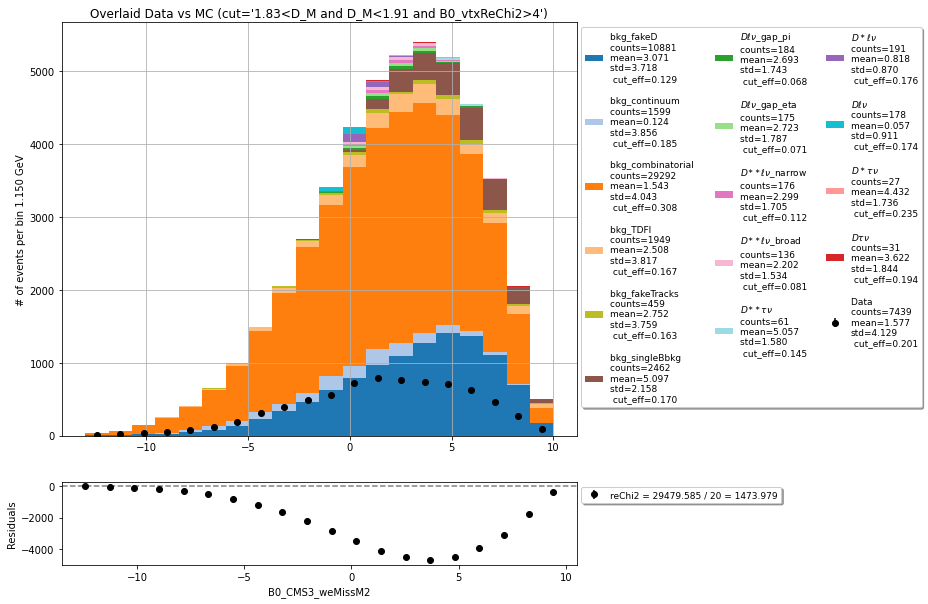

In [130]:
# D_M signal region
b1 = np.linspace(-13,10,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(13,8.5),
                          cut='1.83<D_M and D_M<1.91 and B0_vtxReChi2>4',
                             correction=False,mask=[],ratio=False,
                             legend_nc=3,legend_fs=9,
                             weights=weights)

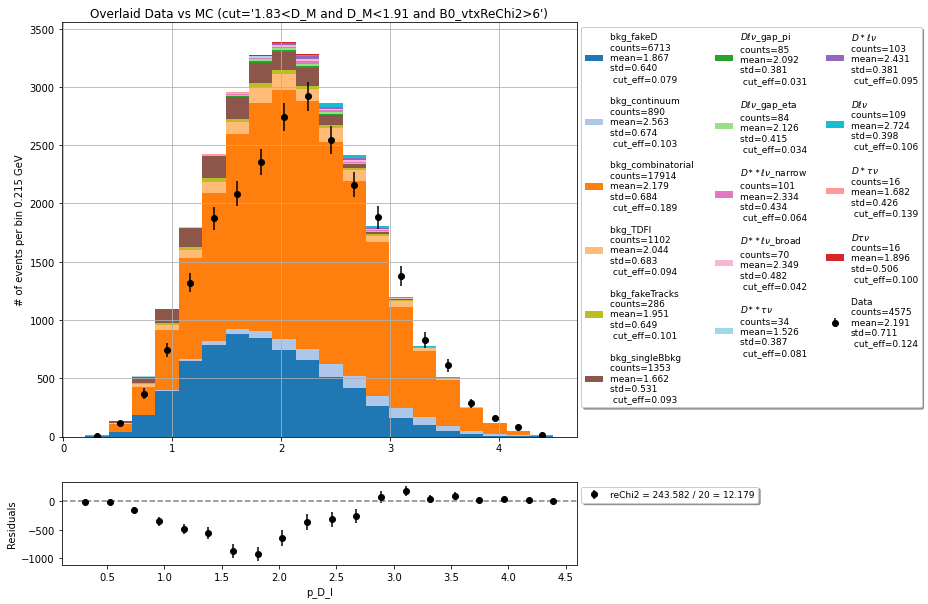

In [78]:
b2 = np.linspace(0.2,4.5,21)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,figsize=(13,8.5),
                          cut='1.83<D_M and D_M<1.91 and B0_vtxReChi2>6',
                             correction=False,mask=[],ratio=False,
                             legend_nc=3,legend_fs=9,
                             weights={
                              'DSemiB_ellPri':    1,
                              'DSemiB_ellSec':    1,
                              'DHad1Charm_ellPri':1,
                              'DHad1Charm_ellSec':1,
                              'DHad2Charm_ellPri':1,
                              'DHad2Charm_ellSec':1,
                              'data':1000/187})

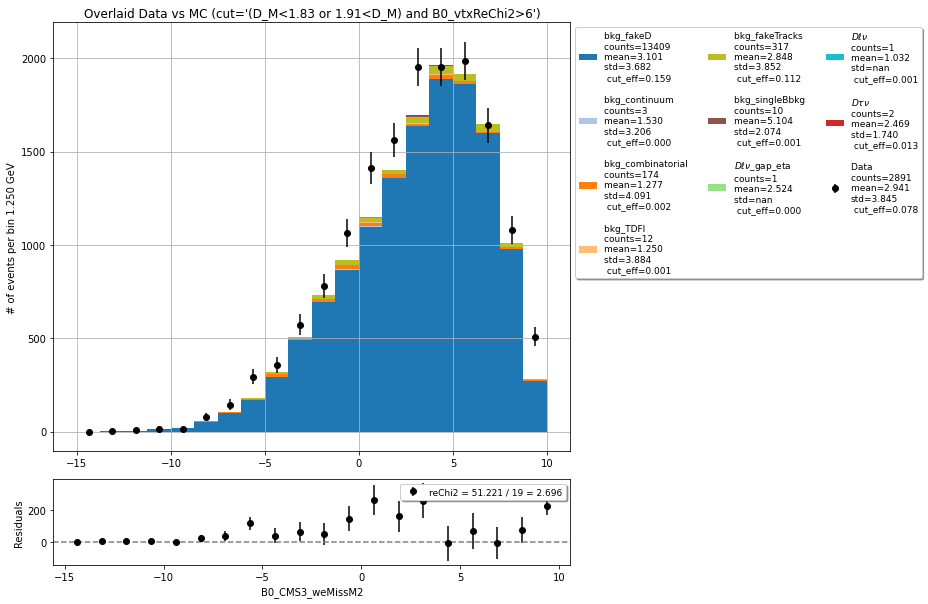

In [79]:
# sidebands
b1 = np.linspace(-15,10,21)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(13,8.5),
                          cut='(D_M<1.83 or 1.91<D_M) and B0_vtxReChi2>6',
                            correction=False,mask=[],ratio=False,
                            legend_nc=3,legend_fs=9,
                            weights={
                              'DSemiB_ellPri':    1,
                              'DSemiB_ellSec':    1,
                              'DHad1Charm_ellPri':1,
                              'DHad1Charm_ellSec':1,
                              'DHad2Charm_ellPri':1,
                              'DHad2Charm_ellSec':1,
                              'data':1000/187})

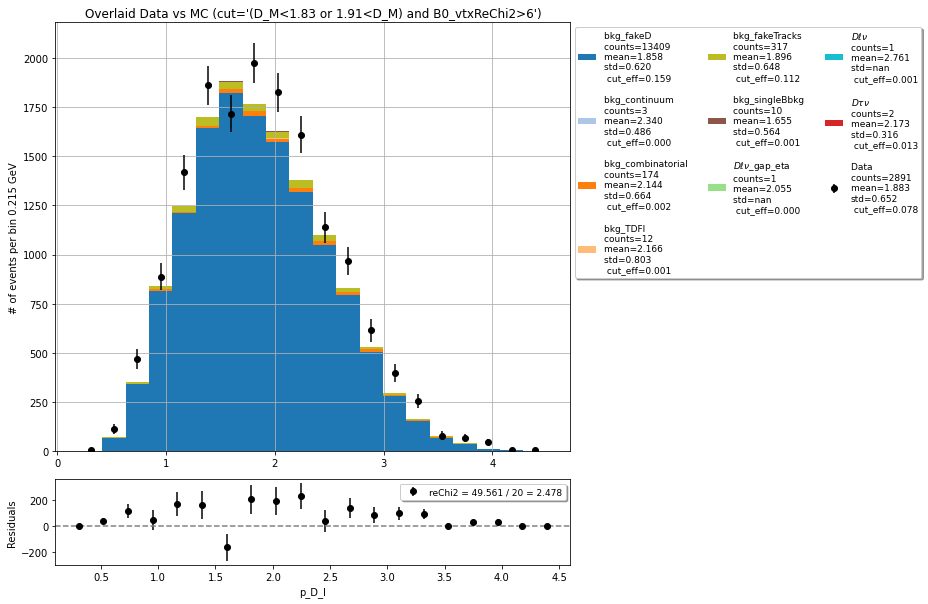

In [80]:
# sidebands
b2 = np.linspace(0.2,4.5,21)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,figsize=(13,8.5),
                          cut='(D_M<1.83 or 1.91<D_M) and B0_vtxReChi2>6',
                            correction=False,mask=[],ratio=False,
                            legend_nc=3,legend_fs=9,
                            weights={
                              'DSemiB_ellPri':    1,
                              'DSemiB_ellSec':    1,
                              'DHad1Charm_ellPri':1,
                              'DHad1Charm_ellSec':1,
                              'DHad2Charm_ellPri':1,
                              'DHad2Charm_ellSec':1,
                              'data':1000/187})

### b. Plot lgb sidebands vs signal region

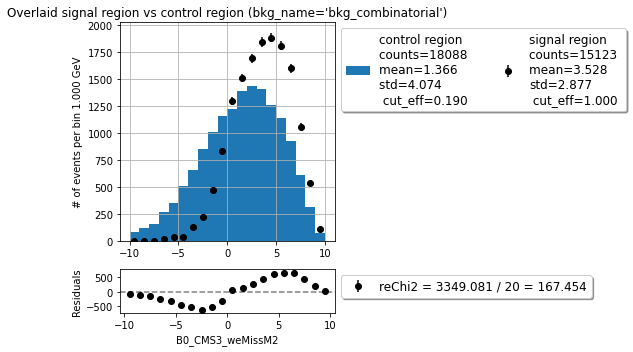

In [19]:
# compare control vs signal regions MC
b1 = np.linspace(-10,10,21)
weights = {'control region': 151/181,
         'signal region': 1}
mpl.plot_mc_sig_control(variable='B0_CMS3_weMissM2',bins=b1,
                        bkg_name='bkg_combinatorial',
                        cut='B0_vtxReChi2>6',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

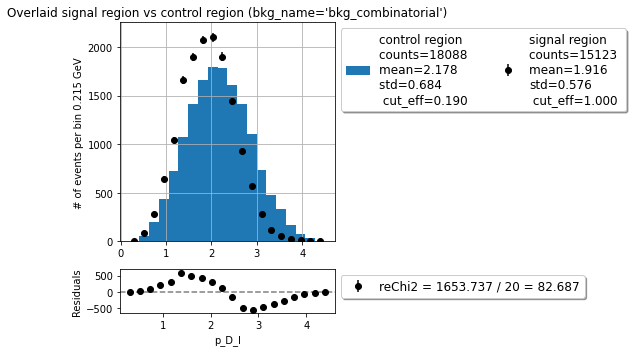

In [20]:
b2 = np.linspace(0.2,4.5,21)
mpl.plot_mc_sig_control(variable='p_D_l',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_vtxReChi2>6',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

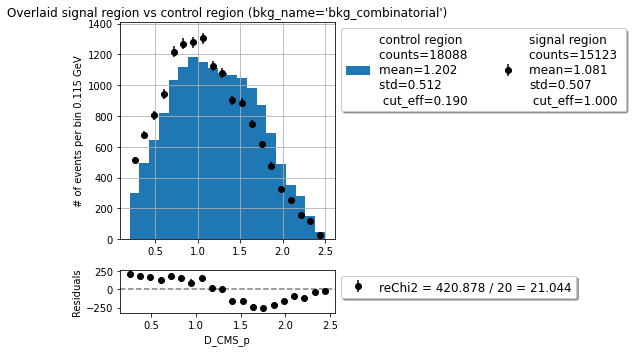

In [21]:
b2 = np.linspace(0.2,2.5,21)
mpl.plot_mc_sig_control(variable='D_CMS_p',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_vtxReChi2>6',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

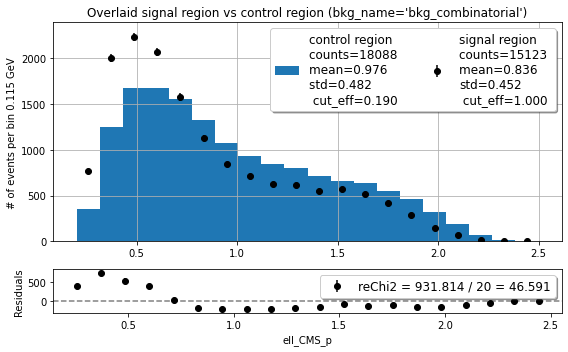

In [22]:
b2 = np.linspace(0.2,2.5,21)
mpl.plot_mc_sig_control(variable='ell_CMS_p',bins=b2,
                        bkg_name='bkg_combinatorial',cut='B0_vtxReChi2>6',
                        samples_sig=samples_sr,
                        weights=weights,correction=False,mask=[])

### c. Subtract the fakeD

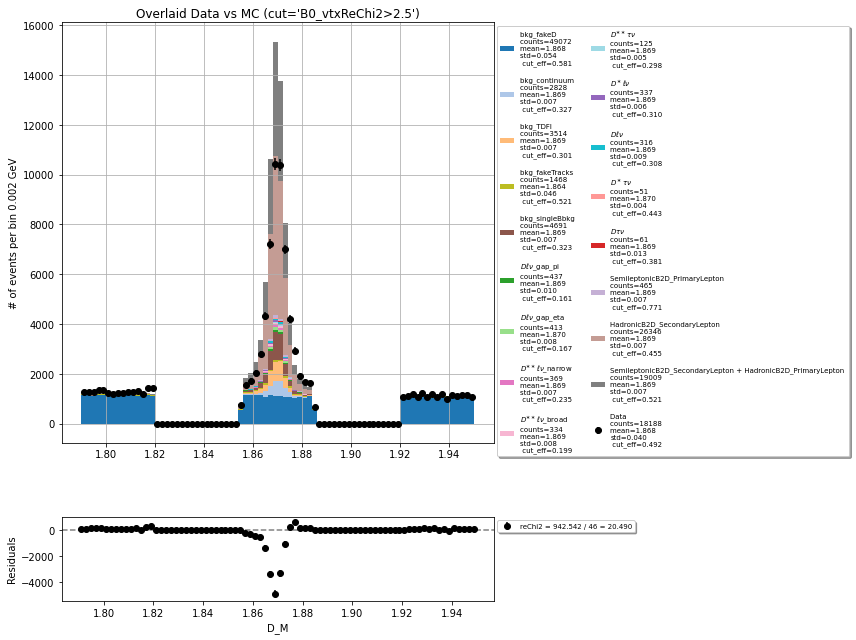

In [116]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,81)
data_hist_all, mc_hist_all = mpl_comb.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='B0_vtxReChi2>2.5',correction=False,mask=[],
    figsize=(12,9),ratio=False,legend_nc=2,legend_fs=7,weights=weights)

In [117]:
fitter = util.fit_Dmass(x_edges=b1, hist=data_hist_all, poly_only=True)
m_ml, c_ml, result_ml = fitter.fit_gauss_poly_ML(deg=1)
m_ml

initial parameters= [ 1.9450e+02  1.8700e+00  4.0000e-02  9.7262e+04 -1.1812e+03  3.4116e+03]


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 90.8 (chi2/ndof = 3.5)     │              Nfcn = 69               │
│ EDM = 1.12e-07 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x0   │     0     │     2     │            │            │    0    │         │  yes  │
│ 1 │ x1   │   1.870   │   0.019   │            │            │    0    │         │  yes  │
│ 2 │ x2   │  40.0e-3  │  0.4e-3   │            │            │    0    │         │  yes  │
│ 3 │ x3   │  95.6e3   │   0.5e3   │            │            │         │         │       │
│ 4 │ x4   │  -1.2e3   │   0.6e3   │            │            │         │         │       │
│ 5 │ x5   │   3.4e3   │   1.7e3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────┐
│    │        x0        x1        x2        x3        x4        x5 │
├────┼─────────────────────────────────────────────────────────────┤
│ x0 │         0         0         0         0         0         0 │
│ x1 │         0         0         0         0         0         0 │
│ x2 │         0         0         0         0         0         0 │
│ x3 │         0         0         0  2.64e+05      -272      -704 │
│ x4 │         0         0         0      -272  3.46e+05 -1.02e+06 │
│ x5 │         0         0         0      -704 -1.02e+06  3.01e+06 │
└────┴─────────────────────────────────────────────────────────────┘

In [118]:
yields_left = fitter.poly_integral(xrange=[1.79,1.82],result=result_ml)
yields_sig = fitter.poly_integral(xrange=[1.855,1.885],result=result_ml)
yields_right = fitter.poly_integral(xrange=[1.92,1.95],result=result_ml)

Yields from 1.79 to 1.82 = 19011.778 ± 141.204
Yields from 1.855 to 1.885 = 17930.750 ± 96.417
Yields from 1.92 to 1.95 = 16849.721 ± 129.323


In [111]:
a = len(df_data_4S_comb.query('1.79<D_M<1.82 and B0_vtxReChi2>3.5')) * 1000/187
b = len(df_data_4S_comb.query('1.92<D_M<1.95 and B0_vtxReChi2>3.5')) * 1000/187
print('data', a,b)

data 14898.395721925133 13053.475935828877


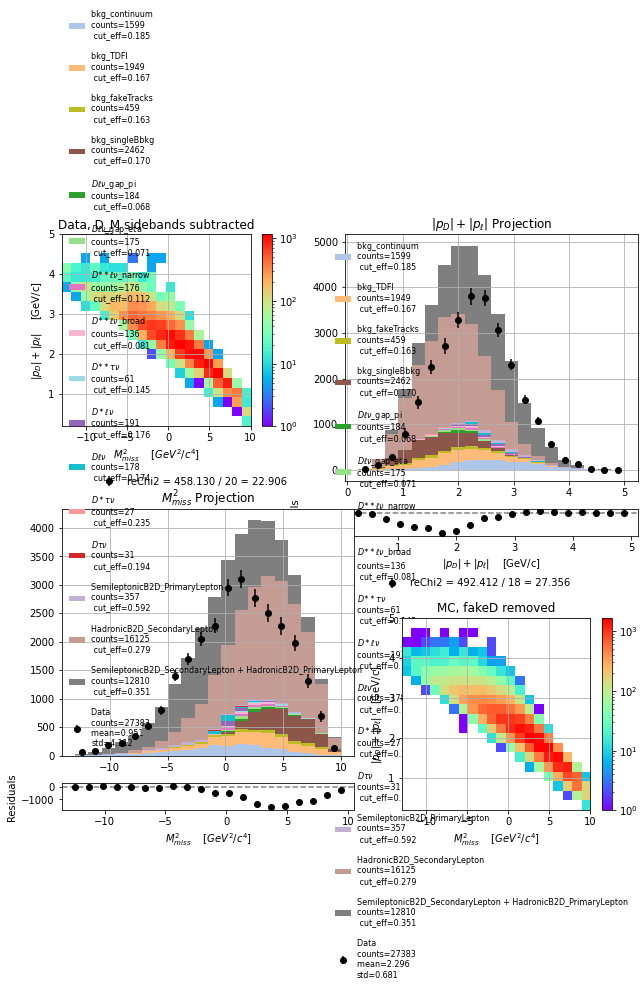

In [131]:
b_mm2 = np.linspace(-13,10,21)
b_pDl = np.linspace(0.2,5,21)
scale = {'data left sideband': 179/190/2 * 1000/187,
         'data right sideband': 179/168/2 * 1000/187,
         'data signal region': 1000/187}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_vtxReChi2>4', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': scale,
          'correction': False,
          'mask': ['bkg_fakeD']}
indices_threshold, temp_data = mpl_comb.plot_data_subtracted_and_mc(**par_dict)

### d.  Fit the combinatorial components

In [120]:
import json
spec_comb_e = util.create_workspace(temp_asimov_channels=[temp_data],
                               mc_uncer=True,fakeD_uncer=True)
spec_comb_e['measurements'][0]['config']['poi']="SemileptonicB2D_PrimaryLepton_norm"
print(json.dumps(spec_comb_e, sort_keys=True, indent=4))

{
    "channels": [
        {
            "name": "channel_0",
            "samples": [
                {
                    "data": [
                        0.0,
                        2.0,
                        1.0,
                        0.0,
                        0.0,
                        1.0,
                        0.0,
                        0.0,
                        6.0,
                        3.0,
                        2.0,
                        0.0,
                        0.0,
                        1.0,
                        7.0,
                        2.0,
                        1.0,
                        4.0,
                        0.0,
                        11.0,
                        10.0,
                        7.0,
                        0.0,
                        0.0,
                        0.0,
                        0.0,
                        13.0,
                        24.0,
                        9.0,
                   

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\ell\nu$_gap_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad1Charm_ellPri_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad1Charm_ellSec_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier DHad2Charm_ellPri_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifi

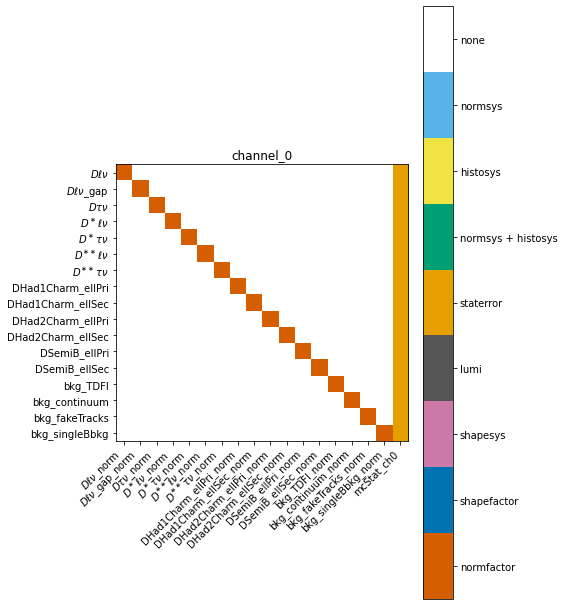

In [134]:
import cabinetry, pyhf
cabinetry.set_logging()
cabinetry.visualize.modifier_grid(pyhf.Workspace(spec_comb_e).model())

In [121]:
model_comb, data_comb = cabinetry.model_utils.model_and_data(spec_comb_e)
pars = model_comb.config.suggested_init()

norm_parameter_names = [par for par in model_comb.config.par_order if par.endswith('_norm')]
for par in norm_parameter_names:
    model_comb.config.param_set(par).suggested_bounds=[[-100,1000]]
    if par.startswith('$'):
        model_comb.config.param_set(par).suggested_fixed=[True]

INFO - pyhf.workspace - Validating spec against schema: workspace.json
INFO - pyhf.pdf - Validating spec against schema: model.json
INFO - pyhf.pdf - adding modifier $D\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\ell\nu$_gap_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^\ast\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\ell\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier $D^{\ast\ast}\tau\nu$_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier HadronicB2D_SecondaryLepton_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier SemileptonicB2D_PrimaryLepton_norm (1 new nuisance parameters)
INFO - pyhf.pdf - adding modifier SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton_

In [124]:
%%time
pyhf.set_backend("jax")
fit_results = cabinetry.fit.fit(model=model_comb, data=data_comb,goodness_of_fit=True,
#                                 init_pars=[1]*7+[3]*3+pars[10:],
#                                 fix_pars=[True]*112
                               )

INFO - cabinetry.fit - performing maximum likelihood fit


W FCN result is NaN for [ 1 1 1 1 1 1 1 nan 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 nan 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 3 nan 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 3 nan 3 1 1 1 1 1 

W FCN result is NaN for [ 1 1 1 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 3 3 3 1 1 1 1 1 1 1 1 1 nan 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 3 3 3 1 1 1 1 1 1 

ERROR - pyhf.optimize.mixins -   message: Optimization failed. Estimated distance to minimum too large.
  success: False
      fun: inf
        x: <ValueView $D\ell\nu$_norm=1.0 $D\ell\nu$_gap_norm=1.0 $D\tau\nu$_norm=1.0 $D^\ast\ell\nu$_norm=1.0 $D^\ast\tau\nu$_norm=1.0 $D^{\ast\ast}\ell\nu$_norm=1.0 $D^{\ast\ast}\tau\nu$_norm=1.0 HadronicB2D_SecondaryLepton_norm=2.9999999999999853 SemileptonicB2D_PrimaryLepton_norm=2.9999999999999853 SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton_norm=2.9999999999999853 bkg_TDFl_norm=1.0 bkg_continuum_norm=1.0 bkg_fakeTracks_norm=1.0 bkg_singleBbkg_norm=1.0 mcStat_ch0[0]=1.0000000000000002 mcStat_ch0[1]=1.0000000000000002 mcStat_ch0[2]=1.0000000000000002 mcStat_ch0[3]=1.0000000000000002 mcStat_ch0[4]=1.0000000000000002 mcStat_ch0[5]=1.0000000000000002 mcStat_ch0[6]=1.0000000000000002 mcStat_ch0[7]=1.0000000000000002 mcStat_ch0[8]=1.0000000000000002 mcStat_ch0[9]=1.0000000000000002 mcStat_ch0[10]=1.0000000000000002 mcStat_ch0[11]=1.000000

W FCN result is NaN for [ 1 1 1 1 1 1 1 -95.9134 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 nan 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 nan 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ]
W FCN result is NaN for [ 1 1 1 1 1 1 1 3 -95.9134 3 

FailedMinimization: Optimization failed. Estimated distance to minimum too large.

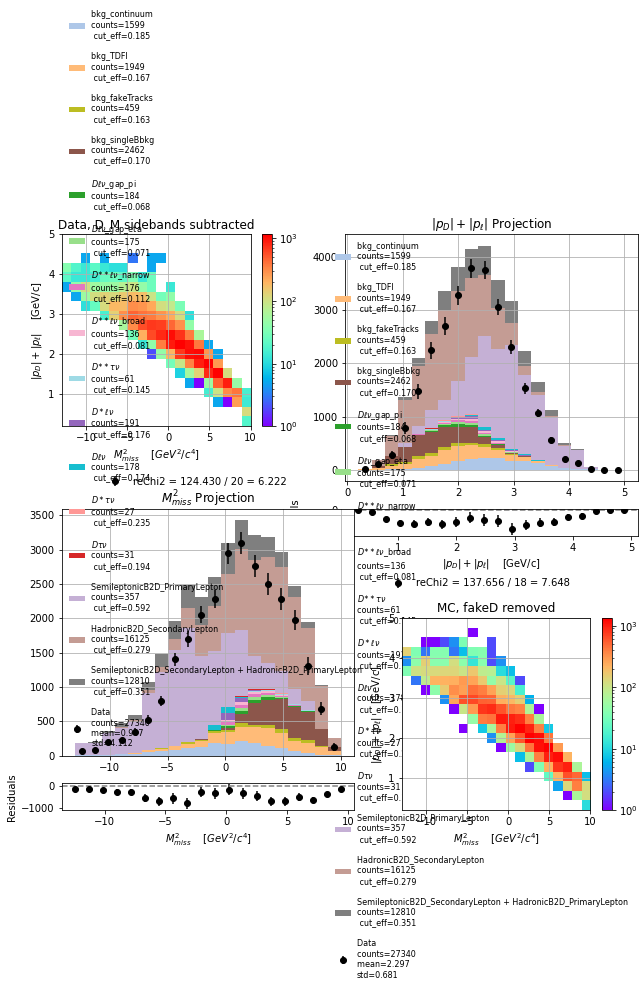

In [132]:
# BDT signal
b_mm2 = np.linspace(-13,10,21)
b_pDl = np.linspace(0.2,5,21)
weights={'data left sideband': 131/139/2 * 1000/187,
         'data right sideband': 131/122/2 * 1000/187,
         'data signal region': 1000/187,
         'SemileptonicB2D_PrimaryLepton': 34.77,
         'HadronicB2D_SecondaryLepton': 0.705,
         'SemileptonicB2D_SecondaryLepton + HadronicB2D_PrimaryLepton': 0.31,}

par_dict={'var_list':['B0_CMS3_weMissM2','p_D_l'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_vtxReChi2>4', #'B0_roeMbc_my_mask>5.1 and -4<B0_roeDeltae_my_mask<1',
          'weights': weights,
          'correction': False,
          'mask': ['bkg_fakeD']}
a, b = mpl_comb.plot_data_subtracted_and_mc(**par_dict)

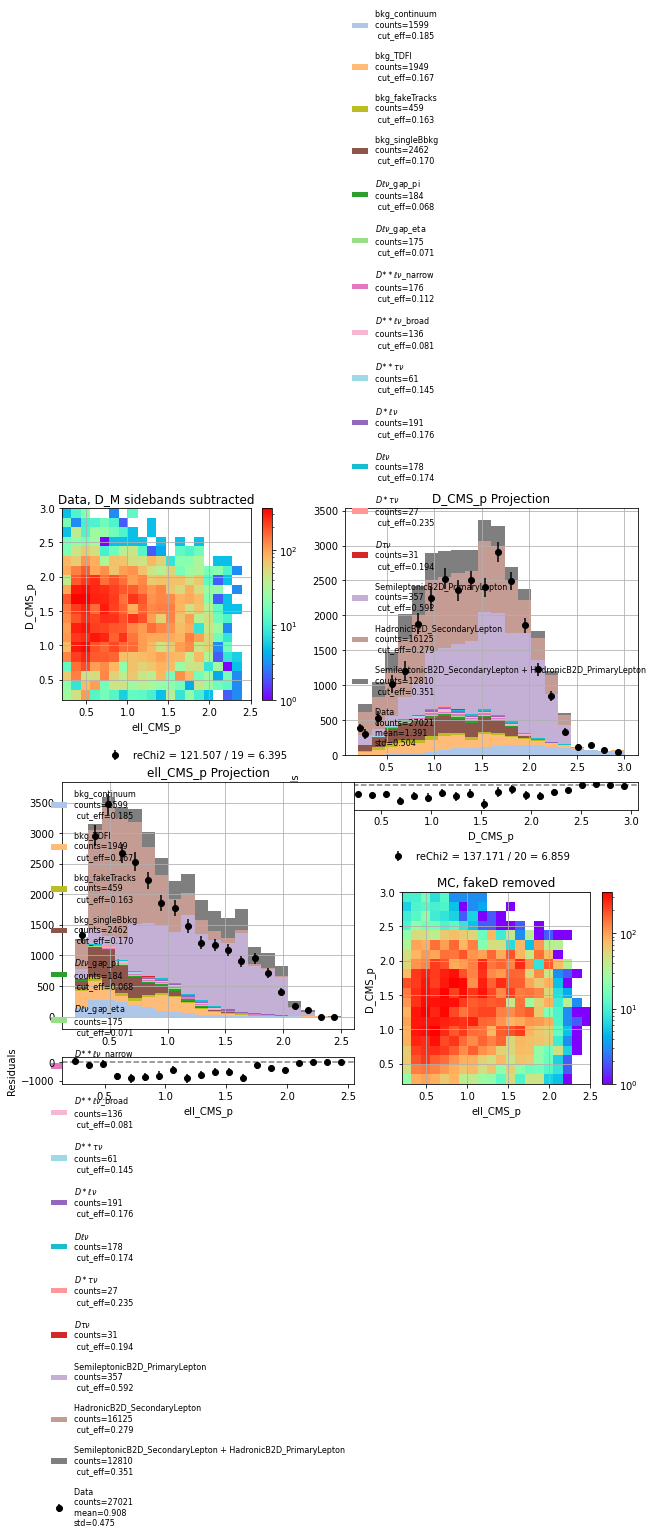

In [133]:
# BDT signal, pl; pd
b_mm2 = np.linspace(0.2,2.5,21)
b_pDl = np.linspace(0.2,3,21)
par_dict={'var_list':['ell_CMS_p','D_CMS_p'],
          'bin_list': [b_mm2, b_pDl],
          'cut': 'B0_vtxReChi2>4',
          'weights': weights,
          'correction': False,
          'mask': ['bkg_fakeD']}
a,b = mpl_comb.plot_data_subtracted_and_mc(**par_dict)